# Sentiment analysis on news dataset using TextBlob

## Dataset link : https://www.kaggle.com/asad1m9a9h6mood/news-articles/data
## TextBlob is an excellent open-source library for performing NLP tasks with ease, including sentiment analysis. It also has a sentiment lexicon (in the form of an XML file) which it leverages to give both polarity and subjectivity scores. 

### Including the required libraries, and reading the dataset.
### The sentiment is "positive" if the score is greater than 0, "neutral" if equal to zero and "negative" if less than 0.

In [1]:
from textblob import TextBlob
import pandas as pd

news_df = pd.read_csv("News.csv")

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['Article']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# sentiment statistics per news category
df = pd.DataFrame([list(news_df['NewsType']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                           \
                        count      mean       std    min    25%    50%   
news_category                                                            
business                920.0  0.046987  0.097260 -0.267 -0.014  0.046   
sports                 1408.0  0.113124  0.108598 -1.000  0.050  0.107   
world                   364.0  0.067016  0.094571 -0.205  0.015  0.072   

                               
                   75%    max  
news_category                  
business       0.10400  0.500  
sports         0.17000  0.800  
world          0.11625  0.396

### Plotting the sentiments

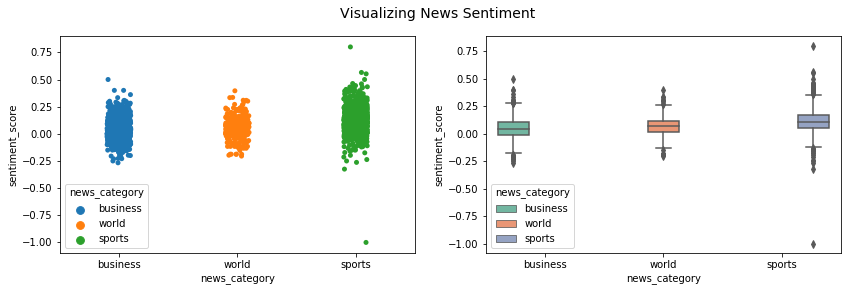

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score", 
                   hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", 
                 hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

/home/utkarsha/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


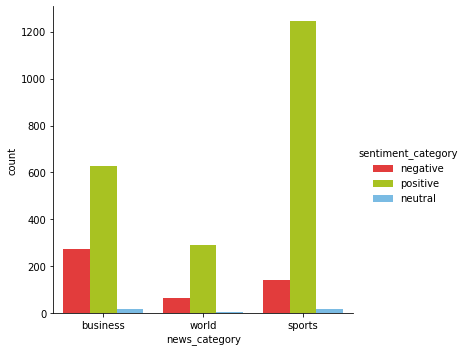

In [3]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

### Displaying the actual sentiments of the articles using Afinn analysing lexicon.

In [4]:
actualResults = news_df['classification']
print(actualResults)

0       negative
1        neutral
2       positive
3       negative
4       negative
          ...   
2687    negative
2688    negative
2689    negative
2690    negative
2691    negative
Name: classification, Length: 2692, dtype: object


## Creating confusion matrix of actual versus predicted sentiments.
## Finding the accuracy of the model and displaying the report inlcuding precision and recall.

### Accuracy = (TP + TN) / (TP + TN + FP + FN)
### Precision = TP / (TP + FP)
### Recall = TP / (TP + FN)



[[ 257   30 1067]
 [  76    5  346]
 [ 151   10  750]]


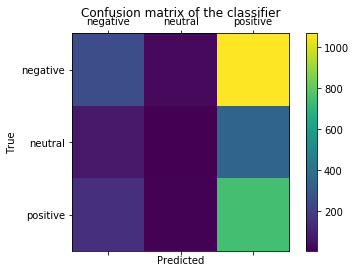

Accuracy Score :
0.37592867756315007
Report : 
              precision    recall  f1-score   support

    negative       0.53      0.19      0.28      1354
     neutral       0.11      0.01      0.02       427
    positive       0.35      0.82      0.49       911

    accuracy                           0.38      2692
   macro avg       0.33      0.34      0.26      2692
weighted avg       0.40      0.38      0.31      2692



In [5]:



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

labels = ['negative', 'neutral', 'positive']
cm = confusion_matrix(actualResults, sentiment_category_tb,labels )
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print('Accuracy Score :')
print(accuracy_score(actualResults, sentiment_category_tb))
print ('Report : ')
print (classification_report(actualResults, sentiment_category_tb))

#### REFERENCES:
##### https://blog.lftechnology.com/predicting-sentiment-on-news-data-45c5c22ec2e3
##### https://www.geeksforgeeks.org/confusion-matrix-machine-learning/